In [1]:
import numpy as np

In [2]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt

In [3]:
start= pd.to_datetime('2015-01-01')
end= pd.to_datetime('2019-01-01')

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date= start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date= start,end_date=end)
amazon = quandl.get('WIKI/AMZN.11',start_date= start,end_date=end)
aapl.head()


,Adj. Close
Date,
2015-01-02,103.863957
2015-01-05,100.937944
2015-01-06,100.947444
2015-01-07,102.362951
2015-01-08,106.295968


In [5]:
stock_list = pd.concat([ibm,amazon,aapl],axis=1)

In [6]:
stock_list.columns = ['ibm','amazon','aapl']

In [7]:
stock_list.pct_change(1).mean()

ibm       0.000129
amazon    0.002107
aapl      0.000702
dtype: float64

In [8]:
stock_list.pct_change(1).corr()

,ibm,amazon,aapl
ibm,1.000000,0.261208,0.361521
amazon,0.261208,1.000000,0.396678
aapl,0.361521,0.396678,1.000000


In [9]:
log_return = np.log(stock_list/stock_list.shift(1))
log_return

,ibm,amazon,aapl
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.015860,-0.020731,-0.028576
2015-01-06,-0.021802,-0.023098,0.000094
2015-01-07,-0.006557,0.010544,0.013925
2015-01-08,0.021502,0.006813,0.037703
...,...,...,...
2018-03-21,0.003132,-0.002935,-0.022915
2018-03-22,-0.029797,-0.024160,-0.014260
2018-03-23,-0.021265,-0.031940,-0.023399


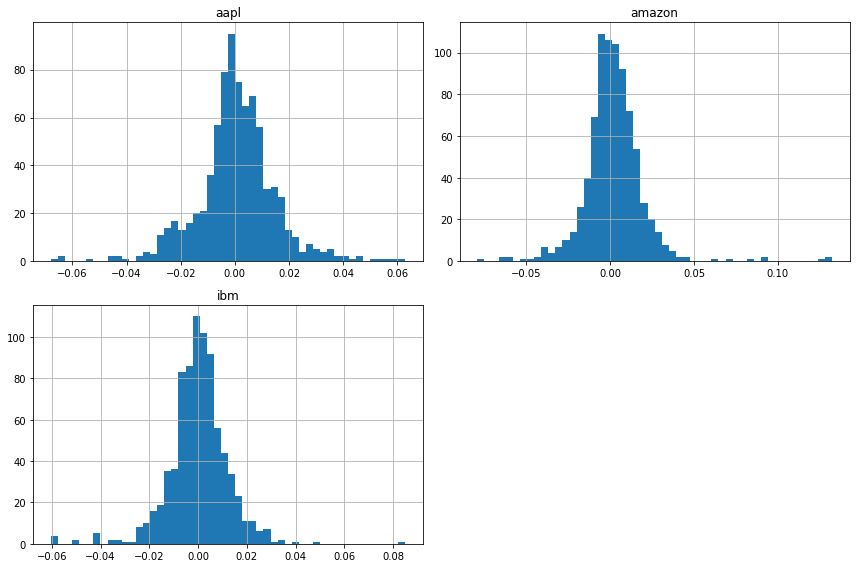

In [10]:
log_return.hist(bins=50,figsize=(12,8))
plt.tight_layout()

In [11]:
log_return.cov() *252

,ibm,amazon,aapl
ibm,0.038505,0.014815,0.016512
amazon,0.014815,0.079926,0.026416
aapl,0.016512,0.026416,0.053759


In [12]:
np.random.seed(101)

weights = np.random.random(3)
weights = weights/np.sum(weights)
weights

array([0.46291341, 0.51156154, 0.02552505])

In [21]:
exp_return = np.sum( log_return.mean()*weights*252)
exp_return

0.2608252666809776

In [23]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))

In [84]:
trials = 1000
weight_trial = np.zeros((trials,len(stock_list.columns)))
exp_return_trial = np.zeros(trials)
exp_vol_trial = np.zeros(trials)
sharpe_trial = np.zeros(trials)

for i in range(trials):
    
    weights = np.random.random(3)
    weights = weights / (np.sum(weights))
    
    weight_trial[i,:] = weights
    exp_return_trial[i] = np.sum( log_return.mean()*weights*252)
    
    exp_vol_trial[i] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    
    sharpe_trial[i] = exp_return_trial[i] / (exp_vol_trial[i])

    

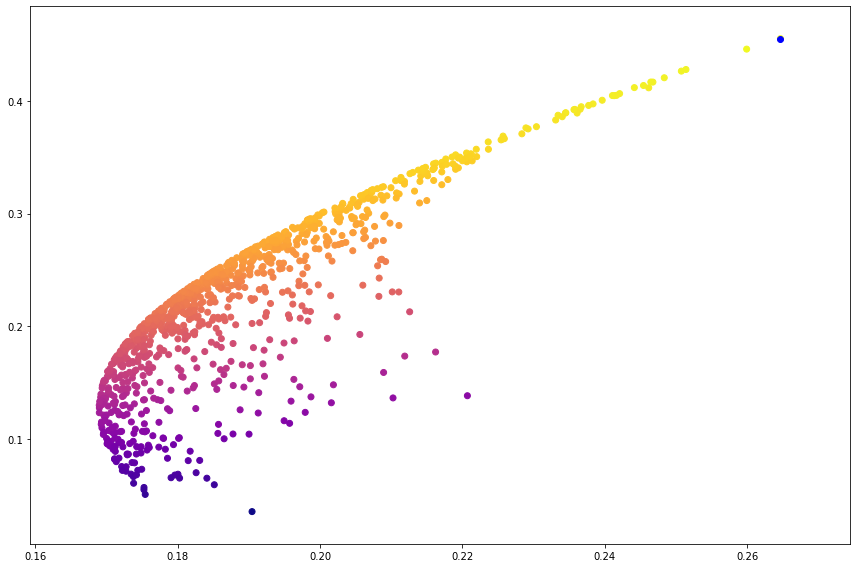

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(exp_vol_trial,exp_return_trial,c=sharpe_trial,cmap='plasma')

opt_value = sharpe_trial.argmax()
plt.scatter(exp_vol_trial[opt_value],exp_return_trial[opt_value],c='blue')
plt.tight_layout()

In [78]:
weight_trial

array([0.00228942, 0.98721793, 0.01049266])